In [197]:
# librarys importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#libraries for machine learning
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed

In [198]:
# 1- read the Dataframe
# using pandas library to read dataframe, providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive
df = pd.read_csv("https://raw.githubusercontent.com/lucastakara/Trading_Sentiment_Tests/master/ML_TEST/dataframe.csv")
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume
0,3377,2010-12-20,67979.0,68196.0,67264.0,67264.0,67264.0,2352800.0
1,159,1998-05-18,10906.0,10908.0,10010.0,10205.0,10205.0,0.0
2,3495,2011-06-13,62701.0,62968.0,62022.0,62023.0,62023.0,1397200.0
3,784,2000-10-09,15946.0,15975.0,15617.0,15855.0,15855.0,0.0
4,2178,2006-02-27,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# 2- sort the dataframe by date
# function is used to sort by the values along either axis.
df2 = df.sort_values(['Date'])
print(df2)

      Unnamed: 0        Date      Open      High       Low     Close  \
2435           0  1997-10-07   12737.0   12737.0   12458.0   12481.0   
2627           1  1997-10-08   12530.0   12530.0   12270.0   12433.0   
3300           2  1997-10-09   12325.0   12725.0   12325.0   12684.0   
4016           3  1997-10-10   12609.0   12778.0   12609.0   12737.0   
2674           4  1997-10-13   12817.0   12817.0   12615.0   12698.0   
...          ...         ...       ...       ...       ...       ...   
2427        6151  2022-02-24  112001.0  112001.0  109125.0  111592.0   
4111        6152  2022-02-25  111591.0  113142.0  110673.0  113142.0   
1973        6153  2022-03-02  113143.0  115429.0  113143.0  115174.0   
720         6154  2022-03-03  115173.0  115948.0  115010.0  115166.0   
24          6155  2022-03-04  115166.0  115166.0  113389.0  114474.0   

      Adj Close      Volume  
2435    12481.0         0.0  
2627    12433.0         0.0  
3300    12684.0         0.0  
4016    12737.0

In [200]:
# 3- correlation of columns, using Pearson correlation method and plot the matrix.
# corr() used to find the pairwise correlation of all columns in the dataframe
# Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.
df2.corr(method = 'pearson', min_periods = 1)
dfCorr = df2.corr(method = 'pearson', min_periods = 1)
dfCorr.style.background_gradient(cmap = 'coolwarm')

,Unnamed: 0,Open,High,Low,Close,Adj Close,Volume
Unnamed: 0,1.000000,0.912166,0.912732,0.911830,0.912188,0.912188,0.034850
Open,0.912166,1.000000,0.999816,0.999712,0.999534,0.999534,0.078123
High,0.912732,0.999816,1.000000,0.999724,0.999790,0.999790,0.078299
Low,0.911830,0.999712,0.999724,1.000000,0.999836,0.999836,0.077933
Close,0.912188,0.999534,0.999790,0.999836,1.000000,1.000000,0.078454
Adj Close,0.912188,0.999534,0.999790,0.999836,1.000000,1.000000,0.078454
Volume,0.034850,0.078123,0.078299,0.077933,0.078454,0.078454,1.000000


In [201]:
# 4- Remove all features from the dataset, except Close price.
# creating a new dataframe with close prices
df3 = df2[['Close']]
df3.head()

,Close
2435,12481.0
2627,12433.0
3300,12684.0
4016,12737.0
2674,12698.0


In [202]:
# 5- Scale the data
# calculating stantard deviation
scaler = StandardScaler()
scaler.fit(df3)
stantard_deviation = scaler.transform(df3) 
print(stantard_deviation)

[[-1.2103511 ]
 [-1.21191782]
 [-1.20372519]
 ...
 [ 2.14154271]
 [ 2.14128159]
 [ 2.11869475]]


In [203]:
# 6- Preprocess the data, shaping it to look back 30 timesteps. (N_samples, Look_back, N_features)
# creating a function that returns an array from the numpy library of data to create the test and training variables
TIME_STEPS=30

def create_sequences(X, y, time_steps=TIME_STEPS):
    Xs, ys = [], []
    for i in range(len(X)-time_steps):
        Xs.append(X.iloc[i:(i+time_steps)].values)
        ys.append(y.iloc[i+time_steps])
    
    return np.array(Xs), np.array(ys)

X_train, y_train = create_sequences(train[['Close']], train['Close'])
X_test, y_test = create_sequences(test[['Close']], test['Close'])

print(f'Training shape: {X_train.shape}')
print(f'Testing shape: {X_test.shape}')

Training shape: (4264, 30, 1)
Testing shape: (1022, 30, 1)


In [204]:
# 7- Split the data into Train/Test 70%/15%.
#the loc property is used to access a group of rows and columns by label(s) or a boolean array.
train, test = df2.loc[df2['Date'] <= '2014-09-03'], df2.loc[df2['Date'] > '2017-12-03']
train.shape, test.shape


((4294, 8), (1052, 8))

In [208]:
# 8 - from here the code started to get very complex
scaler= StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

/tmp/ipykernel_5372/2038364903.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_5372/2038364903.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [194]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(rate=0.2))
model.add(RepeatVector(X_train.shape[1]))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(X_train.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_6 (Dropout)         (None, 128)               0         
                                                                 
 repeat_vector_3 (RepeatVect  (None, 30, 128)          0         
 or)                                                             
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           131584    
                                                                 
 dropout_7 (Dropout)         (None, 30, 128)           0         
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 1)            129       
 tributed)                                            

In [58]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1,
                    callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')], shuffle=False)

Epoch 1/100
120/120 [==============================] - 8s 44ms/step - loss: nan - val_loss: nan
Epoch 2/100
120/120 [==============================] - 5s 41ms/step - loss: nan - val_loss: nan
Epoch 3/100
120/120 [==============================] - 5s 43ms/step - loss: nan - val_loss: nan


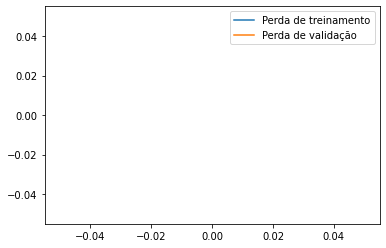

In [195]:
plt.plot(history.history['loss'], label='Perda de treinamento') 
plt.plot(history.history['val_loss'], label='Perda de validação') 
plt.legend();

In [51]:
model.evaluate(X_test, y_test)

58/58 [==============================] - 1s 14ms/step - loss: nan


nan